In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint


# Ejercicio 1, Pendulo simple
## Edgar Iván Preciado Govea

 1.- Escribe un código simple en python, para resolver la ecuación de movimiento de un péndulo simple utilizando la sintaxis básica, i.e cómo si fuera C/fortran    
  
  2.- Reescribe dicho código aprovechando el manejo de arreglos de numpy. 
  
  3.- En ambos casos muestra tus resultados usando tablas y gráficos. Compara los resultados, en terminos de los tiempos de ejecución. 
  Puedes elegir libremente los parámetros para el péndulo.
  
  4.- Permite que los parámetros para el pendulo puedan ser proporcionados por el usuario, y ejecutar el código desde una terminal. 
  
  Al finalizar la sesión, i.e. 7pm deben subir su actualización al repositorio 
  
  La ecuación a resolver esta dada por $\ddot{\theta}=-\frac{g}{l}\theta$.
  
 Para resolver, realicemos el siguiente cambio de variables: $\ddot{\theta}=\dot{x}$ 
 y 
 $\dot{\theta}=x$. 
 
 Con lo que debemos resolver las ecuaciones 
 
 $\dot{\theta}=x$
 y 
 $\dot{x}=-\frac{g}{l}\theta$
 
 Definimos la función $pedndulo=pendudo(y,t,c)$ que a su vez depende de la función vectorial $\vec{y}=(\theta,x)$, del parametro $t$ y de la constante $c$ relacionada con la longuitud $l$ del pendulo y de la constante gravitatoria $g$.
 
 $\mathbf{f}(\mathbf{x})=\pmatrix{y\\ y'}'=\pmatrix{y'\\y''}=\pmatrix{y'\\cy}$
  

In [82]:
def pendulo(y, t, c):
    theta, x = y
    dydt = [x, -c*theta]
    return dydt

In [83]:

c = 1.96

In [84]:
y0 = [np.pi - 0.1, 0.0]

In [85]:
t = np.linspace(0, 10, 101)

In [86]:
from scipy.integrate import odeint
sol = odeint(pendulo, y0, t, args=(c,))

In [87]:
print (sol)

[[ 3.04159265  0.        ]
 [ 3.0118337  -0.59420662]
 [ 2.92313916 -1.17678582]
 [ 2.77724459 -1.73633765]
 [ 2.57700487 -2.2619128 ]
 [ 2.3263383  -2.74322681]
 [ 2.03014994 -3.17086133]
 [ 1.69423563 -3.53644844]
 [ 1.3251685  -3.8328343 ]
 [ 0.93017046 -4.05421923]
 [ 0.51697083 -4.19627117]
 [ 0.09365511 -4.25621044]
 [-0.33149325 -4.23286416]
 [-0.75015496 -4.12668916]
 [-1.15413763 -3.93976308]
 [-1.53553612 -3.67574368]
 [-1.88688723 -3.3397973 ]
 [-2.20131572 -2.93849774]
 [-2.47266884 -2.47969764]
 [-2.69563677 -1.97237479]
 [-2.86585645 -1.4264565 ]
 [-2.97999703 -0.8526253 ]
 [-3.03582501 -0.26210991]
 [-3.03224794  0.33353444]
 [-2.96933582  0.92265219]
 [-2.84831971  1.49371547]
 [-2.67156766  2.03554971]
 [-2.44253836  2.53755231]
 [-2.16571345  2.98990006]
 [-1.84650984  3.38374143]
 [-1.49117372  3.7113697 ]
 [-1.1066583   3.96637388]
 [-0.70048777  4.14376405]
 [-0.28061009  4.240069  ]
 [ 0.14475857  4.25340424]
 [ 0.56729459  4.18350884]
 [ 0.97872979  4.0317505 ]
 

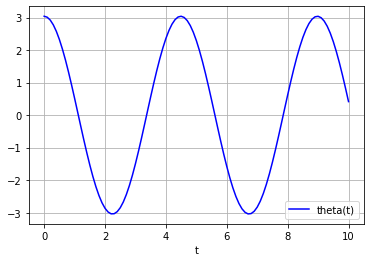

In [26]:
import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

# (Por otra parte) Usando Runge Kutta

In [62]:
import numpy as np 
import matplotlib.pyplot as plt
import array

In [63]:
#definiendo el modelo general
def pendulosimple(x, params):
        alpha = params["alpha"]
        beta = params["beta"]
       
        
        xdot = np.array([-alpha*x[1], beta*x[0]])
                         
        return xdot

In [64]:
#Runge Kutta 
def RungeKutta4(f, x0, t0, tf, dt):
    
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    nx = x0.size
    x = np.zeros((nx,nt))
    
    x[:,0] = x0
    
    for k in range(nt - 1):
        k1 = dt*f(t[k], x[:,k])
        k2 = dt*f(t[k]+dt/2, x[:,k]+k1/2)
        k3 = dt*f(t[k]+dt/2, x[:,k]+k2/2)
        k4 = dt*f(t[k]+dt, x[:,k]+k3)
        
        dx = (k1 +2*k2 + 2*k3 + k4)/6
        
        x[:,k+1] = x[:,k] + dx
    return x,t 
        
    

In [68]:
params = {"alpha":2.0, "beta":1.0}

f = lambda t, x : pendulosimple(x, params)

x0 = np.array([1.0, 1.0])

t0 = 0.0
tf = 10
dt = 0.01


In [69]:
x, t = RungeKutta4(f, x0, t0, tf, dt)

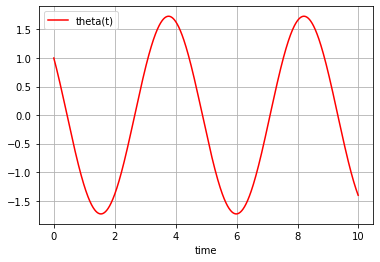

In [73]:

plt.plot(t, x[0,:], "r", label = "theta(t)")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.show()


# Comparando tiempos 


In [183]:
from timeit import default_timer as timer

start = timer()

from scipy.integrate import odeint
sol = odeint(pendulo, y0, t, args=(c,))

end = timer()
print(end - start)

0.00346104499840294


In [182]:
start = timer()
def RungeKutta4(f, x0, t0, tf, dt):
    
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    nx = x0.size
    x = np.zeros((nx,nt))
    
    x[:,0] = x0
    
    for k in range(nt - 1):
        k1 = dt*f(t[k], x[:,k])
        k2 = dt*f(t[k]+dt/2, x[:,k]+k1/2)
        k3 = dt*f(t[k]+dt/2, x[:,k]+k2/2)
        k4 = dt*f(t[k]+dt, x[:,k]+k3)
        
        dx = (k1 +2*k2 + 2*k3 + k4)/6
        
        x[:,k+1] = x[:,k] + dx
    return x,t 
end = timer()
print(end - start)

0.0007060450006974861
